In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
from glob import glob
from collections import defaultdict
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
from polyglot.text import Text

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\loujo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\loujo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\loujo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
# datasets
news_files = glob('./news_articles/*.txt')

# Named Entity Recognition

## NER with `nltk`

In [5]:
with open(news_files[4], 'r', encoding='utf-8') as file:
    news = file.read()

In [6]:
# tokenize the article into sentences
sentences = sent_tokenize(news)

# tokenize each sentence into words
token_sents = [word_tokenize(sent) for sent in sentences]

# tag each tokenize sentence into parts of speech:
pos_sents = [nltk.pos_tag(sent) for sent in token_sents]

# create the named entity chunks
chunked_sents = nltk.ne_chunk_sents(pos_sents,
                                    binary=True)

# test for stems of the tree with 'NE' tags
for sent in chunked_sents:
    for chunk in sent:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


## Charting practice

In [7]:
chunked_sents_nb = nltk.ne_chunk_sents(pos_sents,
                                       binary=False)

In [8]:
# create defaultdict
ner_categories = defaultdict(int)

# create the nested for loop
for sent in chunked_sents_nb:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# create a list of chart labels from the dictionary
labels = list(ner_categories.keys())

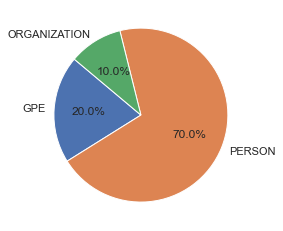

In [9]:
# create a list of values
values = [ner_categories.get(v) for v in labels]

# create the pie chart
plt.pie(values, 
        labels=labels,
        autopct='%1.1f%%',
        startangle=140)

plt.show()

# Introduction to `spacy`

In [10]:
# instantiate the english model
nlp = spacy.load('en_core_web_sm',
                 tagger=False,
                 parser=False,
                 matcher=False)

In [11]:
# create new document
doc = nlp(news)

# print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG unroll.me
ORG Apple
PERSON Uber
FAC Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


# Multilingual NER with polyglot

As of writing, there is no straightforward installation for `polyglot` in Anaconda. Please follow the steps here in https://stackoverflow.com/questions/37512311/cant-install-python-polyglot-package-on-windows by Prayson W. Daniel. Worked for me.

For French:

In [14]:
# !polyglot download ner2.fr
# !polyglot download embeddings2.fr

[polyglot_data] Downloading package ner2.fr to
[polyglot_data]     C:\Users\loujo\AppData\Roaming\polyglot_data...
[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     C:\Users\loujo\AppData\Roaming\polyglot_data...


For Spanish:

In [15]:
# !polyglot download ner2.es
# !polyglot download embeddings2.es

[polyglot_data] Downloading package ner2.es to
[polyglot_data]     C:\Users\loujo\AppData\Roaming\polyglot_data...
[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     C:\Users\loujo\AppData\Roaming\polyglot_data...


## French NER with `polyglot`

In [18]:
with open(news_files[2], 'r', encoding='utf-8') as f:
    fr = f.read()

In [20]:
# create a new text object using Polyglot's Text class
txt = Text(fr)

# print each of the entities found
for ent in txt.entities:
    print(ent)
    
print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [21]:
# create a list of tuples
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


## Spanish NER with `polyglot`

In [23]:
with open(news_files[3], 'r', encoding='utf-8') as f:
    es = f.read()

In [43]:
txt = Text(es)

count = 0

# count how many "Gabo" or "Márquez" there are
for ent in txt.entities:
    if ('Márquez' in ent)|('Gabo' in ent):
        count += 1

print(f'count:{count}')
print(f'percentage that refer to Gabo:{count / len(txt.entities): .2f}')

count:28
percentage that refer to Gabo: 0.30
